In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def readImagesAndTimes():
  
  times = np.array([ 1/20, 0.4, 2.5, 13 ], dtype=np.float32)
  
  filenames = ["dorm_1.jpg", "dorm_2.jpg", "dorm_3.jpg", "dorm_4.jpg"]

  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    images.append(im)
  
  return images, times

if __name__ == '__main__':
  # Read images and exposure times
  print("Reading images ... ")

  images, times = readImagesAndTimes()
  
  
  # Align input images
  print("Aligning images ... ")
  alignMTB = cv2.createAlignMTB()
  alignMTB.process(images, images)
  
  # Obtain Camera Response Function (CRF)
  print("Calculating Camera Response Function (CRF) ... ")
  calibrateDebevec = cv2.createCalibrateDebevec()
  responseDebevec = calibrateDebevec.process(images, times)
  
  # Merge images into an HDR linear image
  print("Merging images into one HDR image ... ")
  mergeDebevec = cv2.createMergeDebevec()
  hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
  # Save HDR image.
  cv2.imwrite("hdrDebevec.hdr", hdrDebevec)
  print("saved hdrDebevec.hdr ")
  
  # Tonemap using Drago's method to obtain 24-bit color image
  print("Tonemaping using Drago's method ... ")
  tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
  ldrDrago = tonemapDrago.process(hdrDebevec)
  ldrDrago = 3 * ldrDrago
  cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
  print("saved ldr-Drago.jpg")
  
  # Tonemap using Durand's method obtain 24-bit color image
  print("Tonemaping using Durand's method ... ")
  tonemapDurand = cv2.createTonemapDurand(1.5,4,1.0,1,1)
  ldrDurand = tonemapDurand.process(hdrDebevec)
  ldrDurand = 3 * ldrDurand
  cv2.imwrite("ldr-Durand.jpg", ldrDurand * 255)
  print("saved ldr-Durand.jpg")
  
  # Tonemap using Reinhard's method to obtain 24-bit color image
  print("Tonemaping using Reinhard's method ... ")
  tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
  ldrReinhard = tonemapReinhard.process(hdrDebevec)
  cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
  print("saved ldr-Reinhard.jpg")
  
  # Tonemap using Mantiuk's method to obtain 24-bit color image
  print("Tonemaping using Mantiuk's method ... ")
  tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
  ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
  ldrMantiuk = 3 * ldrMantiuk
  cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
  print("saved ldr-Mantiuk.jpg")

Reading images ... 
Aligning images ... 
Calculating Camera Response Function (CRF) ... 
Merging images into one HDR image ... 
saved hdrDebevec.hdr 
Tonemaping using Drago's method ... 
saved ldr-Drago.jpg
Tonemaping using Durand's method ... 
saved ldr-Durand.jpg
Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg
Tonemaping using Mantiuk's method ... 
saved ldr-Mantiuk.jpg


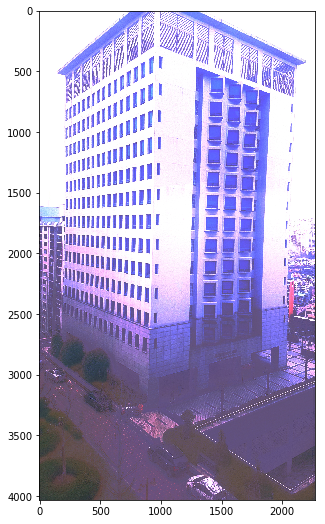

In [116]:
result_1 = '/home/khan/cv/dorm/ldr-Drago.jpg'
result_1 = cv2.imread(result_1, -225)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(result_1)

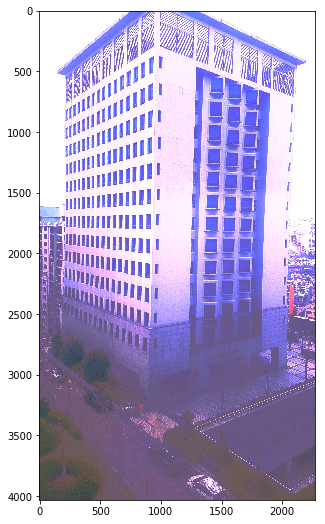

In [124]:
result_2 = '/home/khan/cv/dorm/ldr-Durand.jpg'
result_2 = cv2.imread(result_2, -70)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(result_2)

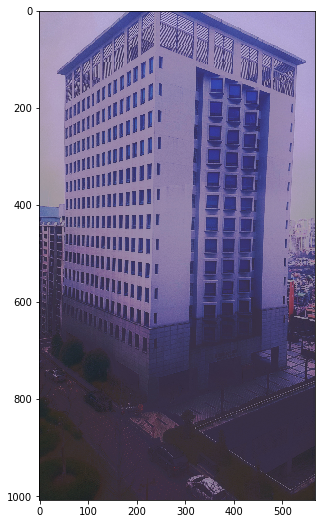

In [121]:
result_3 = '/home/khan/cv/dorm/ldr-Reinhard.jpg'
result_3 = cv2.imread(result_3, 111)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(result_3)

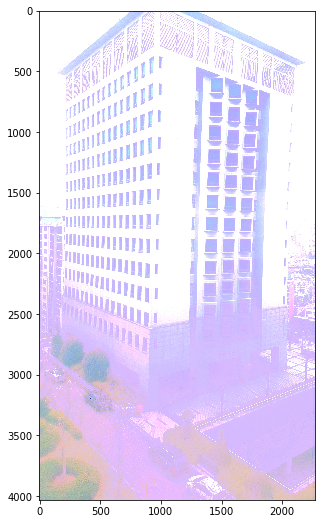

In [125]:
result_4 = '/home/khan/cv/dorm/ldr-Mantiuk.jpg'
result_4 = cv2.imread(result_4, 10)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(result_4)